In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
power=pd.read_csv('PowerGeneration.csv')

In [4]:
power.head()

Dates      Power Station  Monitored Cap.(MW)  \
0  2017-09-01              Delhi              2235.4   
1  2017-09-01            Haryana              2720.0   
2  2017-09-01   Himachal Pradesh              3378.0   
3  2017-09-01  Jammu and Kashmir              1285.0   
4  2017-09-01             Punjab              3826.3   

   Total Cap. Under Maintenace (MW)  Planned Maintanence (MW)  \
0                            135.00                      0.00   
1                           2470.00                      0.00   
2                            379.00                      0.00   
3                            150.00                      0.00   
4                           2697.65                     77.65   

   Forced Maintanence(MW)  Other Reasons (MW)  Programme or Expected(MU)  \
0                   135.0                   0                         13   
1                  2470.0                   0                         28   
2                   231.0                   0                         40   
3                     0.0                   0                         14   
4                  2620.0                   0                         39   

   Actual(MU)  Excess(+) / Shortfall (-)  Deviation  
0          18                       5.00        0.0  
1           7                     -21.80        0.0  
2          46                       5.63        0.0  
3          23                       9.43        0.0  
4          17                     -21.69        0.0

In [5]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345273 entries, 0 to 345272
Data columns (total 11 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Dates                             345273 non-null  object 
 1   Power Station                     345273 non-null  object 
 2   Monitored Cap.(MW)                345273 non-null  float64
 3   Total Cap. Under Maintenace (MW)  345273 non-null  float64
 4   Planned Maintanence (MW)          345273 non-null  float64
 5   Forced Maintanence(MW)            345273 non-null  float64
 6   Other Reasons (MW)                345273 non-null  int64  
 7   Programme or Expected(MU)         345273 non-null  int64  
 8   Actual(MU)                        345273 non-null  int64  
 9   Excess(+) / Shortfall (-)         345273 non-null  float64
 10  Deviation                         345273 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 29.

In [7]:
power.columns

Index(['Dates', 'Power Station', 'Monitored Cap.(MW)',
       'Total Cap. Under Maintenace (MW)', 'Planned Maintanence (MW)',
       'Forced Maintanence(MW)', 'Other Reasons (MW)',
       'Programme or Expected(MU)', 'Actual(MU)', 'Excess(+) / Shortfall (-)',
       'Deviation'],
      dtype='object')

In [9]:
power.describe()

Monitored Cap.(MW)  Total Cap. Under Maintenace (MW)  \
count       345273.000000                     345273.000000   
mean          1577.734493                        474.522117   
std           2619.897504                        840.791783   
min              0.000000                          0.000000   
25%            208.000000                          0.000000   
50%            600.000000                        135.000000   
75%           1458.000000                        600.000000   
max          19813.590000                       9685.490000   

       Planned Maintanence (MW)  Forced Maintanence(MW)  Other Reasons (MW)  \
count             345273.000000           345273.000000       345273.000000   
mean                  65.213392              307.177523           22.012005   
std                  204.164108              656.641688          150.334633   
min                    0.000000                0.000000            0.000000   
25%                    0.000000                0.000000            0.000000   
50%                    0.000000                0.000000            0.000000   
75%                    0.000000              300.000000            0.000000   
max                 3020.000000             9193.590000         4620.000000   

       Programme or Expected(MU)     Actual(MU)  Excess(+) / Shortfall (-)  \
count              345273.000000  345273.000000              345273.000000   
mean                   16.551630      19.246217                  -0.615647   
std                    34.852273      38.306851                   9.717728   
min                     0.000000       0.000000                -147.330000   
25%                     0.000000       0.000000                  -1.590000   
50%                     3.000000       5.000000                   0.000000   
75%                    16.000000      20.000000                   1.230000   
max                   304.000000     466.000000                 177.240000   

           Deviation  
count  345273.000000  
mean        0.296424  
std        35.290388  
min      -100.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max      6000.000000

<AxesSubplot:>

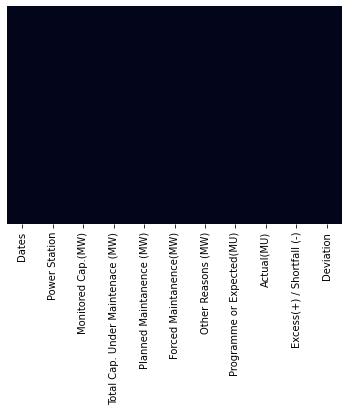

In [11]:
sns.heatmap(power.isnull(),yticklabels=False,cbar=False)

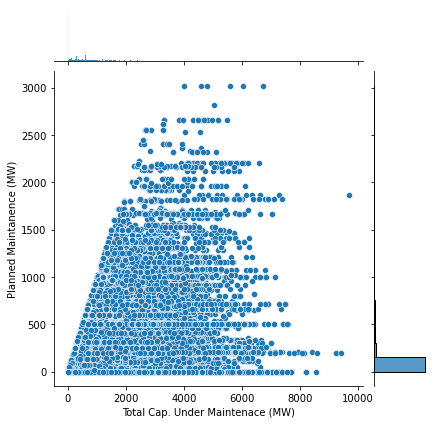

In [19]:
sns.jointplot(x='Total Cap. Under Maintenace (MW)',y='Planned Maintanence (MW)',data=power)

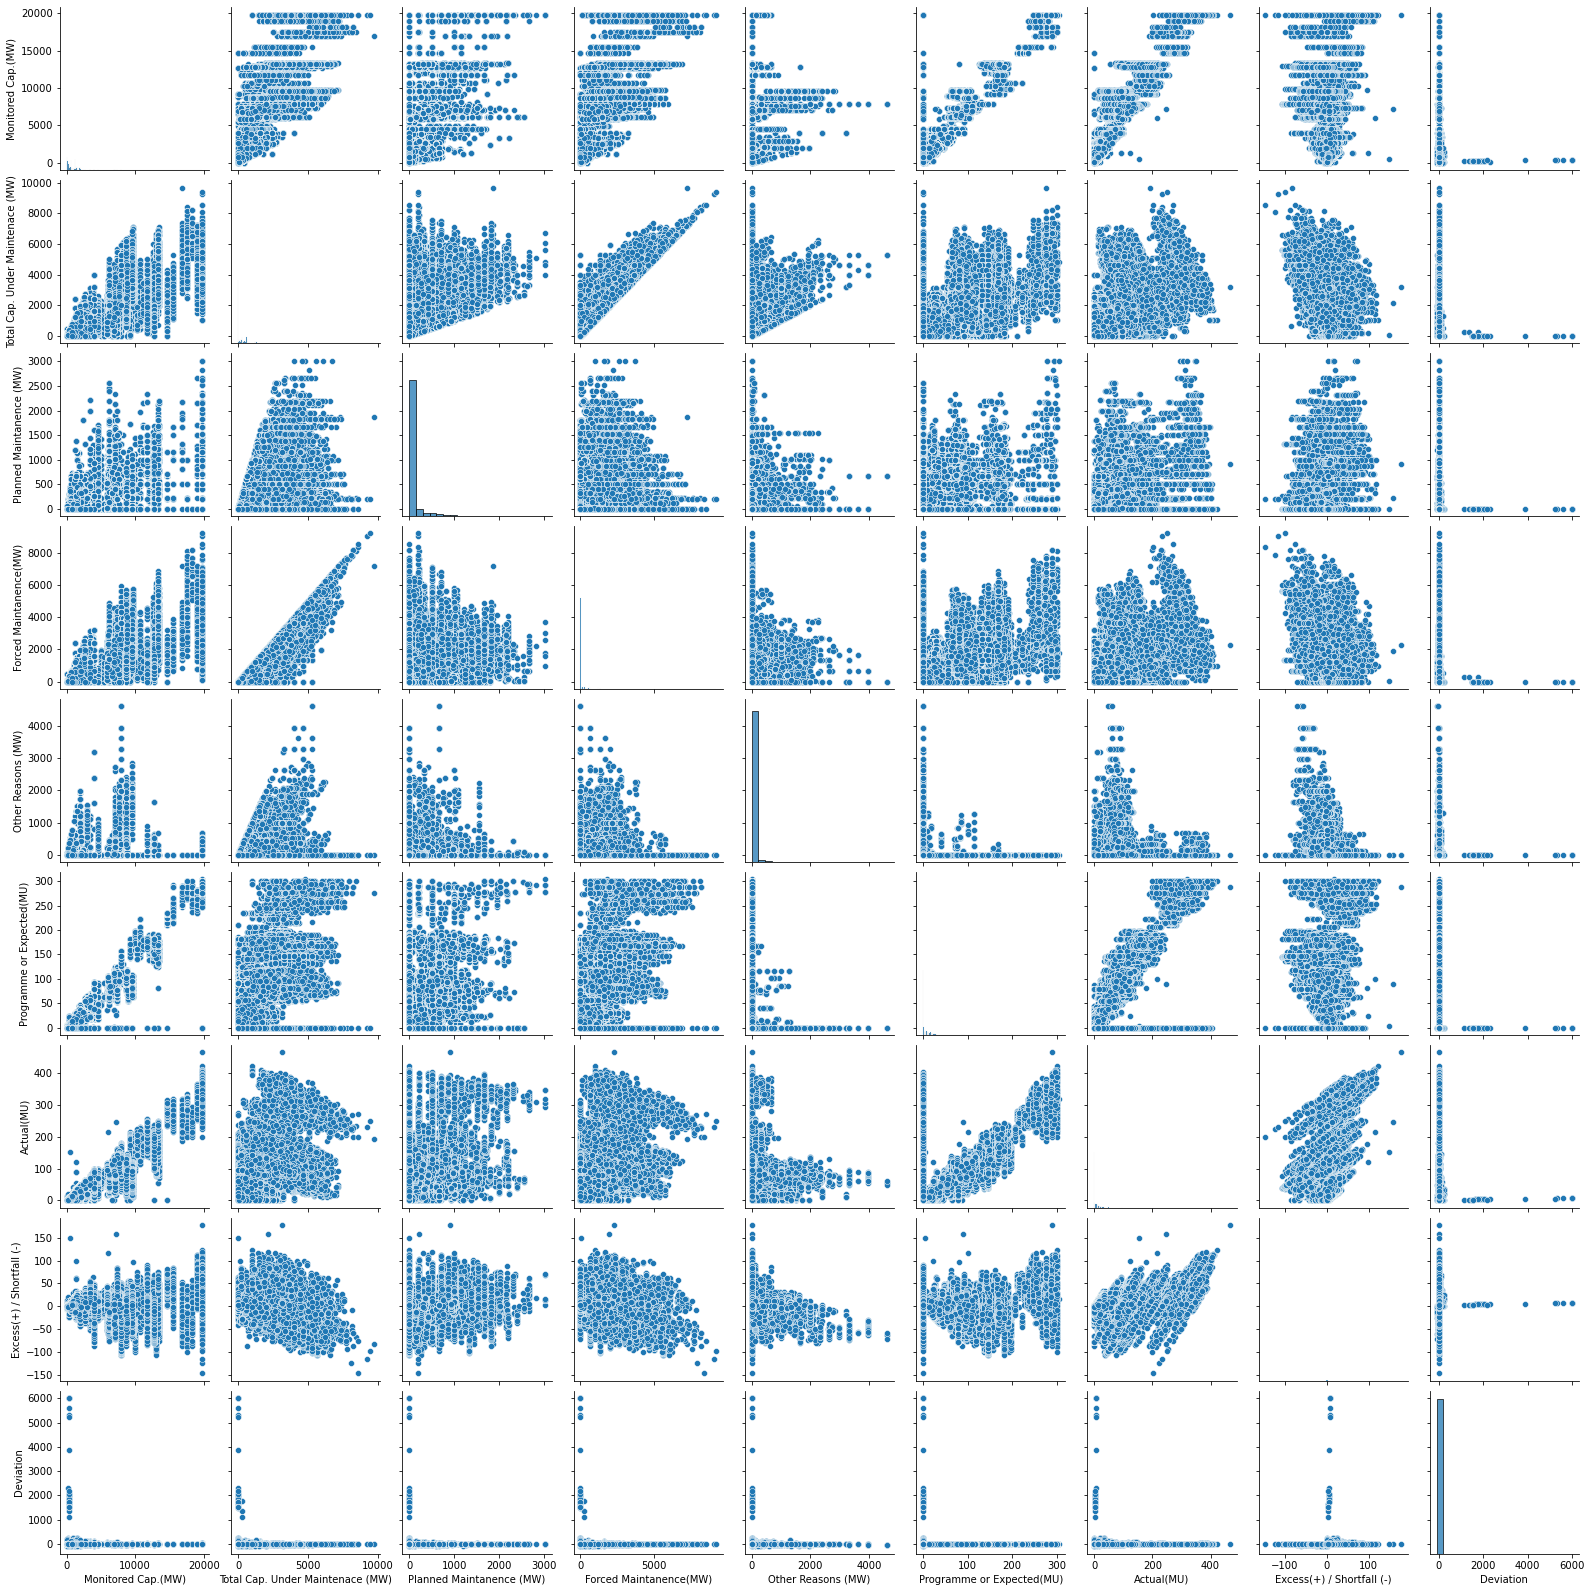

In [20]:
sns.pairplot(power)

In [21]:
from pandas_profiling import ProfileReport

In [22]:
pp_report=ProfileReport(power)
pp_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

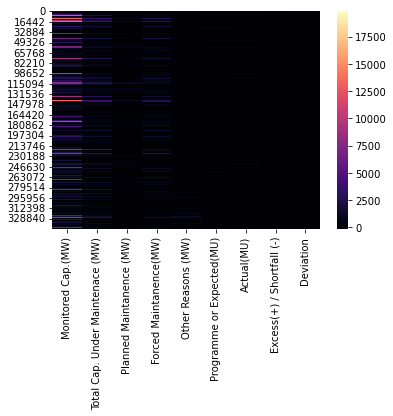

In [29]:
sns.heatmap(power,cmap='magma',linecolor='white')

In [23]:
from sklearn.model_selection import train_test_split

In [42]:
X=power.drop('Monitored Cap.(MW)',axis=1)
y=power['Monitored Cap.(MW)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lr=LinearRegression()

In [45]:
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
predic=lr.predict(X_test)

In [53]:
predic

array([1272.48761006, 2102.58139956, 1290.95866816, ..., 1505.45410652,
        203.90771295,   87.46985385])

In [57]:
print(lr.intercept_)

87.46985384715845


In [59]:
coeff_df=pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])

In [60]:
coeff_df

Coefficient
Total Cap. Under Maintenace (MW)     1.188182
Planned Maintanence (MW)             0.043561
Forced Maintanence(MW)              -0.189893
Other Reasons (MW)                  -0.125003
Programme or Expected(MU)            0.914113
Actual(MU)                          49.952553
Excess(+) / Shortfall (-)          -12.782263
Deviation                            0.047208

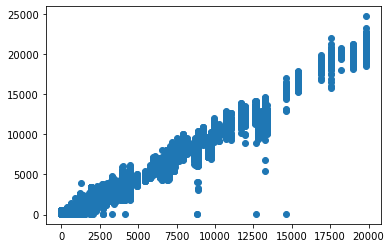

In [62]:
plt.scatter(y_test,predic)

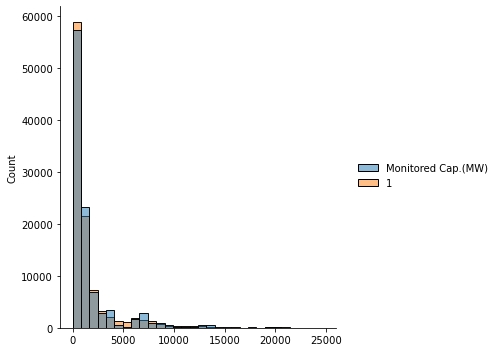

In [69]:
sns.displot((y_test,predic),bins=30)

In [70]:
from sklearn import metrics

In [71]:
print(metrics.mean_absolute_error(y_test,predic))

238.60367236406822


In [72]:
print(metrics.mean_squared_error(y_test,predic))

181750.29341761107


In [73]:
print(np.sqrt(metrics.mean_squared_error(y_test,predic)))

426.3218190728819
